## DSC 550-T302
## Week 2 Assignment
## Lincoln Brown
## Professor Werner

## Adult or Census Income Dataset
### https://archive.ics.uci.edu/dataset/2/adult

For the assignment this week, we will be working with the adult dataset also known as the Census Income Dataset. 
This dataset was extracted from the 1994 Census database by Barry Becker. 

This dataset was designed for predicting whether a person's income will be over $50K a year. The dataset is likely to be imbalanced and not an adequate representative respresentation of the enitre population. However, it will be good to look at the characteristics of the dataset and understand how the different attributes are distributed to see just how imbalanced it is. 

I chose this dataset because it contains attributes including education level, income, age, and job type. I want to investigate the relationship between education level and other demographic attributes. I also want to investigate the factors that are used in predicting income levels. Predicting whether income is above or below $50k is the primary use of the dataset, but I will not be doing that at this time. Creating data visualizations will help me explore this dataset more clearly and I will primarily be focusing on bar graphs, box plots, and a pie chart to accomplish this.  



In [53]:
# Import libraries 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [54]:
# Load adult.names file to extract column names
names_file = "adult.names"
with open(names_file, 'r') as data:
    names_data = data.readlines()

## Add headers to the dataframe
We need to add headers to the dataframe. To do this, we will extract them from the names text file that accompanies the dataset. After working with the file, I realized that the income column header was missing, so I went ahead and added it to the text file to make the process consistent.

In [55]:
# The column names are contained in the last 15 lines of the text file
# Each column name ends with a colon, some of them also contain hyphens
# We will use regex to extract based on this pattern
col_names = []
#pattern = re.compile(r'\w+(?:-\w+)?:')
pattern = re.compile(r'\w+(?:-\w+)?(?:-\w+)?:')
for line in names_data[-15:]:
    col_name = pattern.findall(line)
    if len(col_name) > 0:
        col_names.append(str(col_name[0]).strip(':'))

print(col_names)

['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [56]:
# Load the adult.data dataframe using the pd.read_csv function.
# We will also specify the headers at this time
data_file = "adult.data"
#adult_df = pd.read_csv(data_file, header=None)
adult_df = pd.read_csv(data_file, header=None)
adult_df.columns = col_names
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [57]:
print(f"There are {adult_df.shape[0]} rows and {adult_df.shape[1]} columns in this dataset")

There are 32561 rows and 15 columns in this dataset


## Describe the dataset
Looking at the descriptive statistics of the quantitative columns, we can see that the mean age is 38, the mean number of hours per week is 43, and mean grade attained is 10 (more on this later). 

In [58]:
adult_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Check for missing values 
This dataset has three columns that contain missing values: workclass and occupation. <br>
However, these values are currently ' ?' not NaN. <br>
We need to address this by replacing with NaN so that they are detectable by Pandas.

In [59]:
adult_df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [60]:
adult_df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [61]:
# Create a new copy of the dataset and replace ' ?' with np.nan
cleaned_df = adult_df.copy()
cleaned_df.replace(' ?', np.nan, inplace=True)

In [62]:
# Looking at the number of NaNs can help us determine whether to drop the missing values
# Or use another method to handle them
cleaned_df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

## Drop NaNs

It will be easiest to handle these missing values by removing them from the dataset.
Now, we will drop these missing values from our dataset so that we do not have any missing values.

In [63]:
# Drop the NaNs 
cleaned_df.dropna(inplace=True)
print(f'There are {cleaned_df.shape[0]} rows and {cleaned_df.shape[1]} columns left after dropping NaNs')

There are 30162 rows and 15 columns left after dropping NaNs


In [64]:
# Verify that our dataset does not contain any NaNs
cleaned_df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

## Visualizations

## Distribution of Education Levels
The first visualization we will look at is a bar graph. 
<br>
This graph represents the distribution of the number of people who have attained specific education levels. 


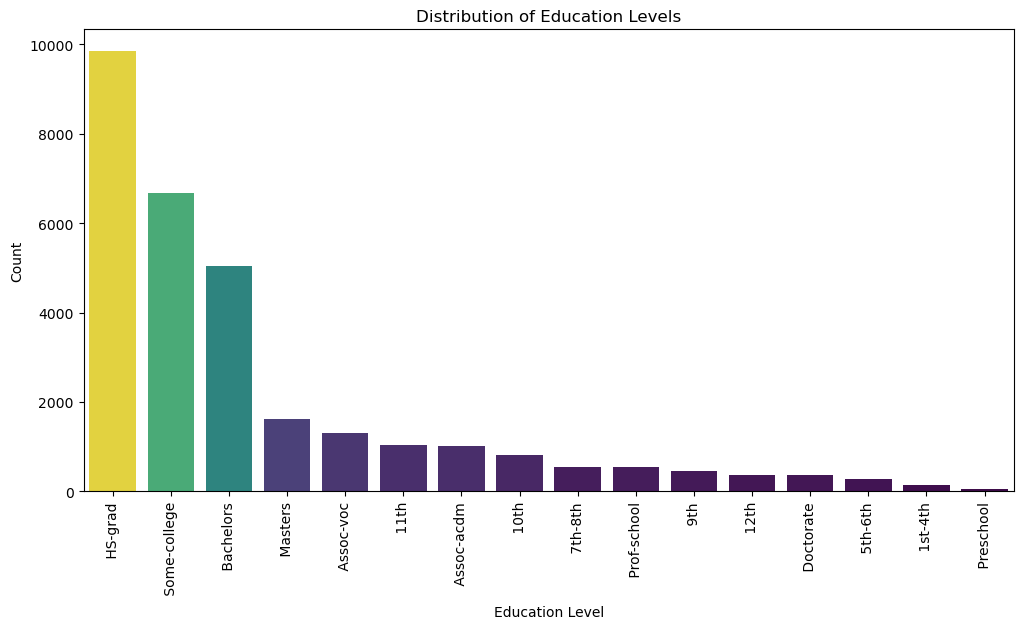

In [65]:
plt.figure(figsize=(12,6))

sns.barplot(x=cleaned_df['education'].value_counts().index, 
            y=cleaned_df['education'].value_counts(), 
            hue=cleaned_df['education'].value_counts(), 
            palette='viridis', 
            legend=False,
            align='edge')

# Set labels and titleå
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Distribution of Education Levels")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Distribution of Education Levels Discussion
A majority of the participants graduated high school. Particpants that have completed some college or received a Bachelor's degree are the next two major groups. 


## Distribution of Education Grade

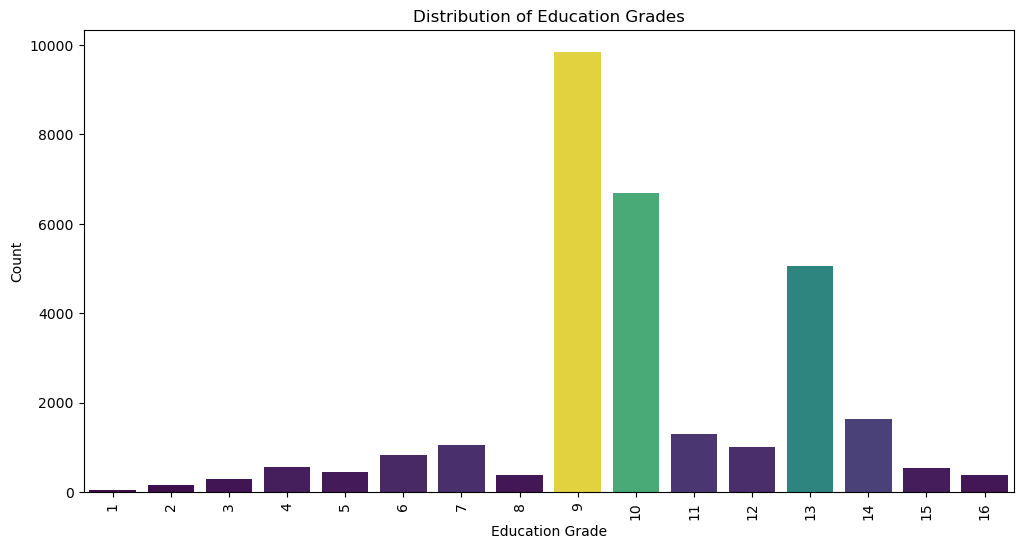

In [66]:
plt.figure(figsize=(12,6))

sns.barplot(x=cleaned_df['education-num'].value_counts().index, 
            y=cleaned_df['education-num'].value_counts(), 
            hue=cleaned_df['education-num'].value_counts(), 
            palette='viridis', 
            legend=False,
            align='edge')

# Set labels and titleå
plt.xlabel("Education Grade")
plt.ylabel("Count")
plt.title("Distribution of Education Grades")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


## Distribution of Education Grade Discussion
From the above graph, we can see a discrepancy between the Education Level and the Education Grade in the dataset. It appears that a High School Diploma is recognized as education grade 9, some college is education grade 10, and a Bachelor's degree is grade 13. This numbering runs contrary to conventional numbering which would put High School graduate at 12th grade. This discrepancy can create a bias in viewers and needs to be addressed. To address this, we will use custom xticks in the box plots below. This will allow us to maintain a horizontal graph layout using the education-num along the x-axis, but have the naming scheme from the Education column.  

## Distribution of Work Sectors

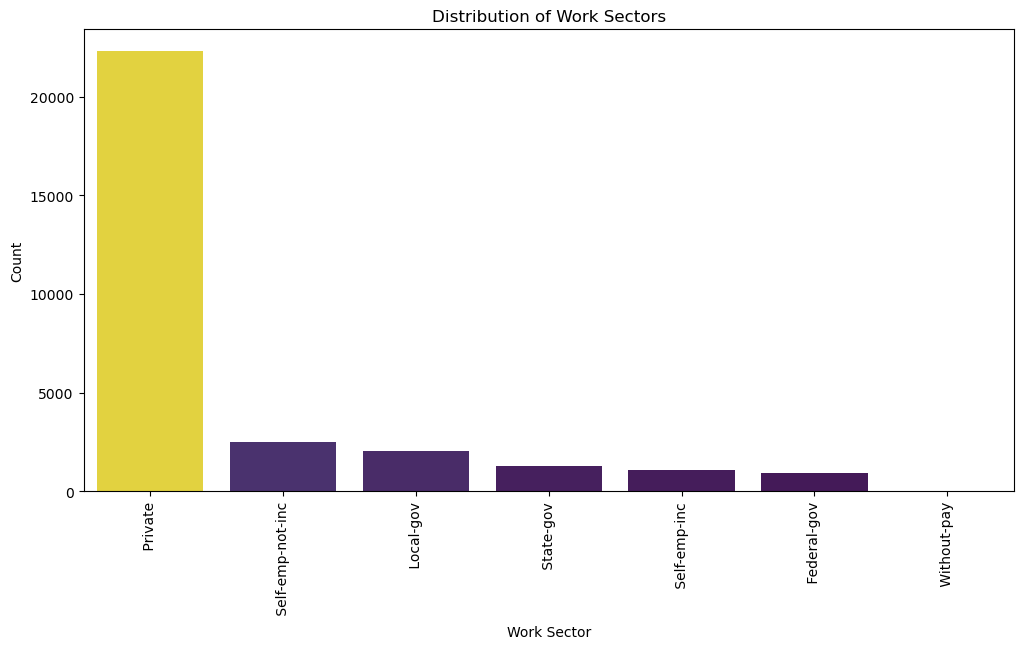

In [67]:
## Bar graph to show the distribution of participants in each work sector
plt.figure(figsize=(12,6))

sns.barplot(x=cleaned_df['workclass'].value_counts().index, 
            y=cleaned_df['workclass'].value_counts(), 
            hue=cleaned_df['workclass'].value_counts(), 
            palette='viridis', 
            legend=False,
            align='edge')

# Set labels and titleå
plt.xlabel("Work Sector")
plt.ylabel("Count")
plt.title("Distribution of Work Sectors")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Distribution of Work Sector Discussion
Predictably, the private work sector had the most participants.

## Distribution of Sex Graph

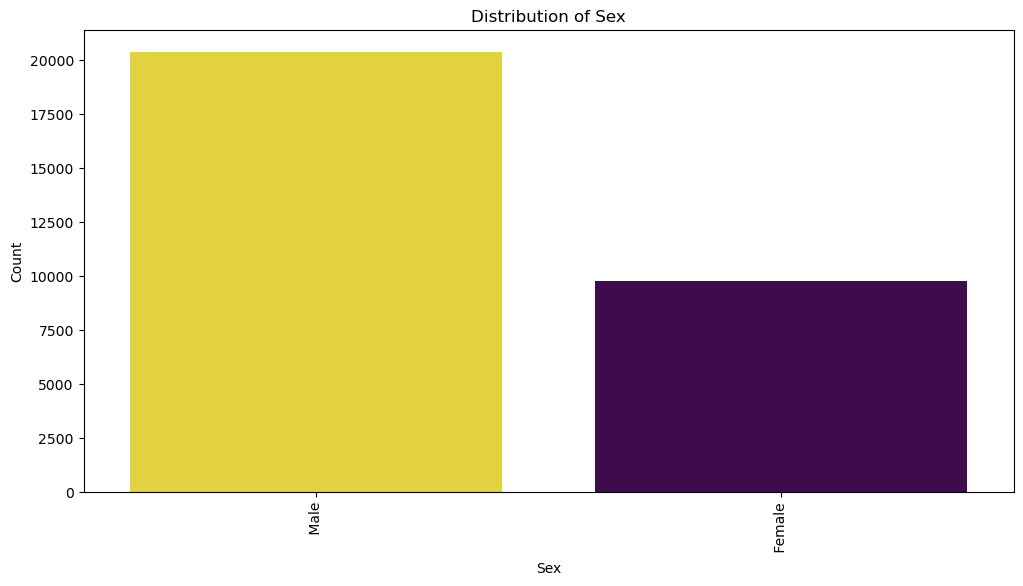

In [68]:
plt.figure(figsize=(12,6))

sns.barplot(x=cleaned_df['sex'].value_counts().index, 
            y=cleaned_df['sex'].value_counts(), 
            hue=cleaned_df['sex'].value_counts(), 
            palette='viridis', 
            legend=False,
            align='edge')

# Set labels and titleå
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

## Distribution of Sex Discussion
It appears that the majority of participants in this survey were male. 

## Create Labels for Use in x-axis

To address the numbering scheme of education grades and conventional wisdom, I will be creating a dictionary of education values that tie the education-num to the education level. 

In [69]:
education_values = dict(zip(cleaned_df['education-num'].unique(), cleaned_df['education'].unique()))
education_values = dict(sorted(education_values.items()))
education_values

{1: ' Preschool',
 2: ' 1st-4th',
 3: ' 5th-6th',
 4: ' 7th-8th',
 5: ' 9th',
 6: ' 10th',
 7: ' 11th',
 8: ' 12th',
 9: ' HS-grad',
 10: ' Some-college',
 11: ' Assoc-voc',
 12: ' Assoc-acdm',
 13: ' Bachelors',
 14: ' Masters',
 15: ' Prof-school',
 16: ' Doctorate'}

## Distribution of Grade Attained by Work Sector

We will use a filtered dataframe to exclude any work sectors that did not have more than 1500 participants. This will help keep the graphs less skewed by outlier categories.

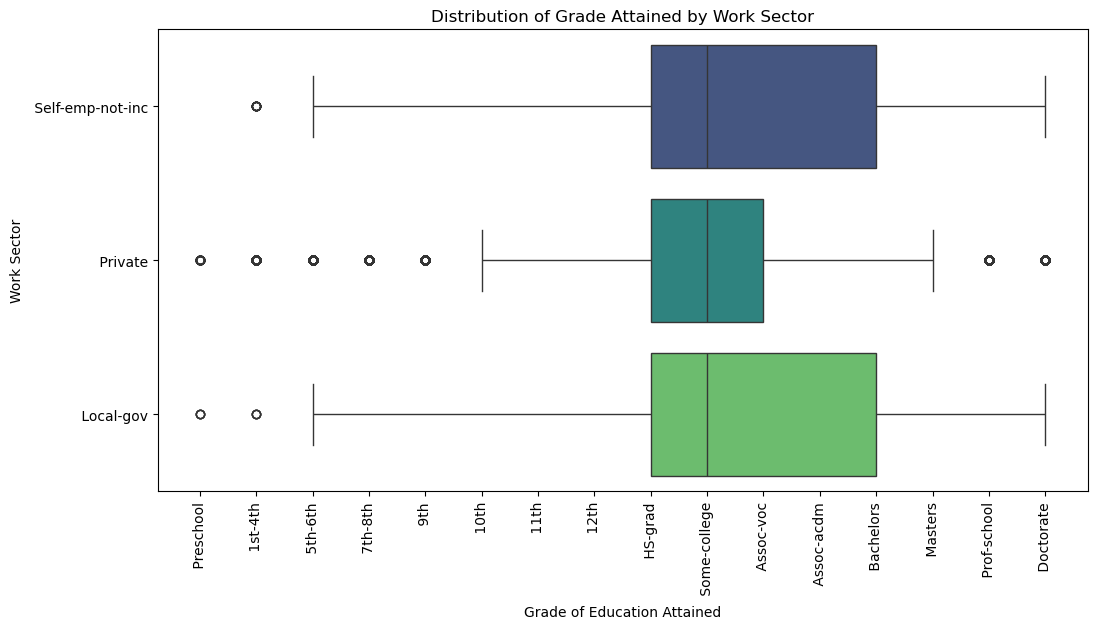

In [70]:
# Create a boxplot to visualize the relationship between Job Employment and Education Level
plt.figure(figsize=(12,6))
filtered_df = cleaned_df.groupby('workclass').filter(lambda x: len(x) >= 1500)
sns.boxplot(x="education-num", 
            y="workclass", 
            data=filtered_df, 
            palette="viridis", 
            hue='workclass', 
            orient="h")

# Set labels and title
plt.xlabel("Grade of Education Attained")
plt.ylabel("Work Sector")
plt.xticks(ticks=list(education_values.keys()),
           labels=list(education_values[key] for key in education_values.keys()))
plt.xticks(rotation=90)
plt.title("Distribution of Grade Attained by Work Sector")
plt.show()

## Distribution of Grade Attained by Work Sector
It is important to note that the circles represent outliers in this graph. For a clearer reading, we will create another boxplot that excludes these datapoints. 

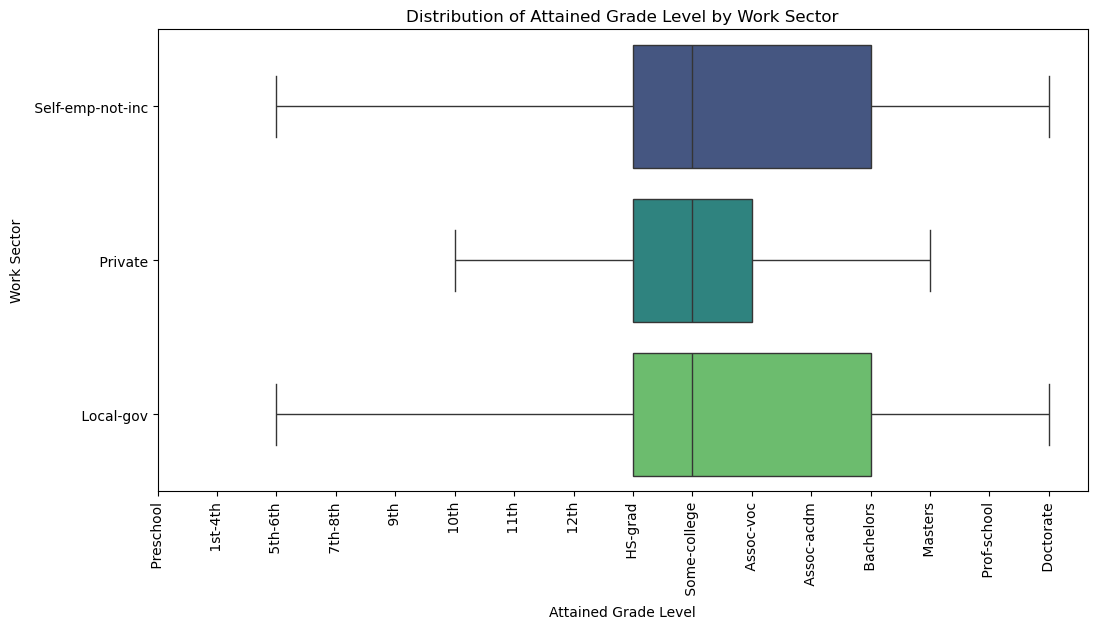

In [71]:
# Create a boxplot to visualize the distribution of attained grade level by work sector
# Omitting outliers
plt.figure(figsize=(12,6))
filtered_df = cleaned_df.groupby('workclass').filter(lambda x: len(x) >= 1500)
sns.boxplot(x="education-num", 
            y="workclass", 
            data=filtered_df, 
            palette="viridis", 
            hue='workclass', 
            orient="h",
            showfliers=False)

# Set labels and title
plt.xlabel("Attained Grade Level")
plt.ylabel("Work Sector")
plt.xticks(ticks=list(education_values.keys()),
           labels=list(education_values[key] for key in education_values.keys()))
plt.xticks(rotation=90)
plt.title("Distribution of Attained Grade Level by Work Sector")
plt.show()

## Distribution of Grade Attained by Work Sector Discussion

This box plot reveals that Some College is the median Education Level for all work sectors. The private work sector has a smaller interquartile range, indicating that most of the participants for this sector attained an education between High School Graduate and Associates-Voc. in the local government and self-employeed not Incorporated work sectors, the interquartile ranges were identical.

## Distribution of Attained Grade Level By Sex
This distribution also contains outliers, which will be omitted from the graph.

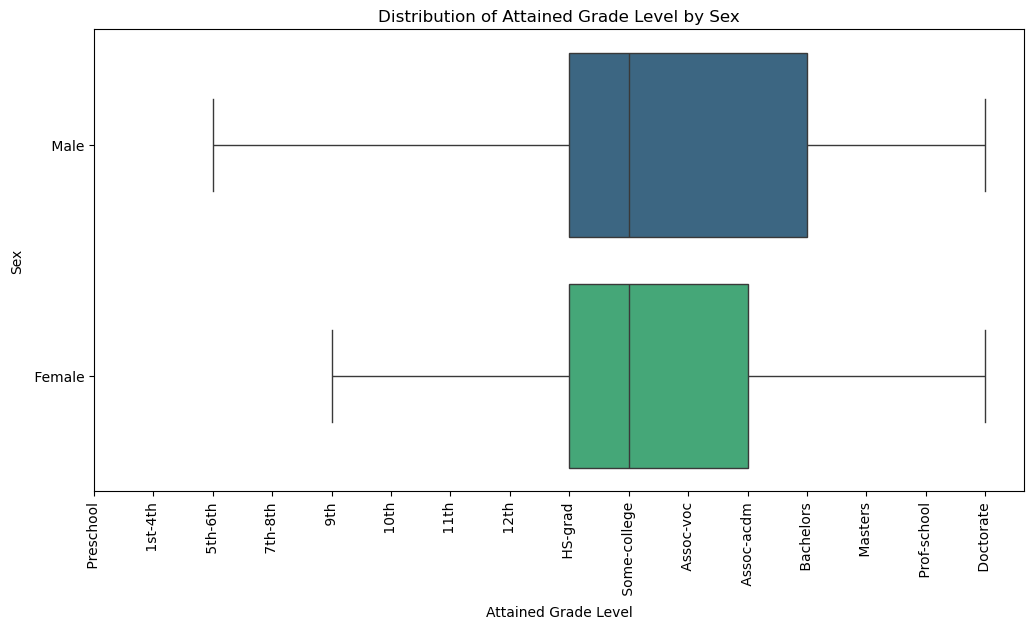

In [72]:
# Create a boxplot to view the distribution of attained grade level by sex
plt.figure(figsize=(12,6))

sns.boxplot(x='education-num',
            y='sex',
            data=cleaned_df,
            palette='viridis',
            hue='sex',
            showfliers=False)

# Set the labels and title
plt.xlabel("Attained Grade Level")
plt.ylabel("Sex")
plt.xticks(ticks=list(education_values.keys()),
           labels=list(education_values[key] for key in education_values.keys()))
plt.xticks(rotation=90)
plt.title("Distribution of Attained Grade Level by Sex")
plt.show()

## Distribution of Attained Grade Level by Sex Discussion
From the box plot above, we can see that males that particpated in the 1994 census attained a slightly higher grade level than females.
<br>
The median grade level attained is the same for both sexes, but more males attained a Bachelor's degree than females.
<br>
I would be interested to see similar census data results for later years, because I anticipate that more females have attained higher education. 
<br><br>
Interestingly, the minimum grade level for males is lower than that for females, indicating that although the female particpants of this  census do not achieve a Bachelor's degree as often as their male counterparts - the spread of their educational attainment is smaller. This indicates that more females did not drop out of school as early as males. 

## Pie Chart to Show Distribution of the Races

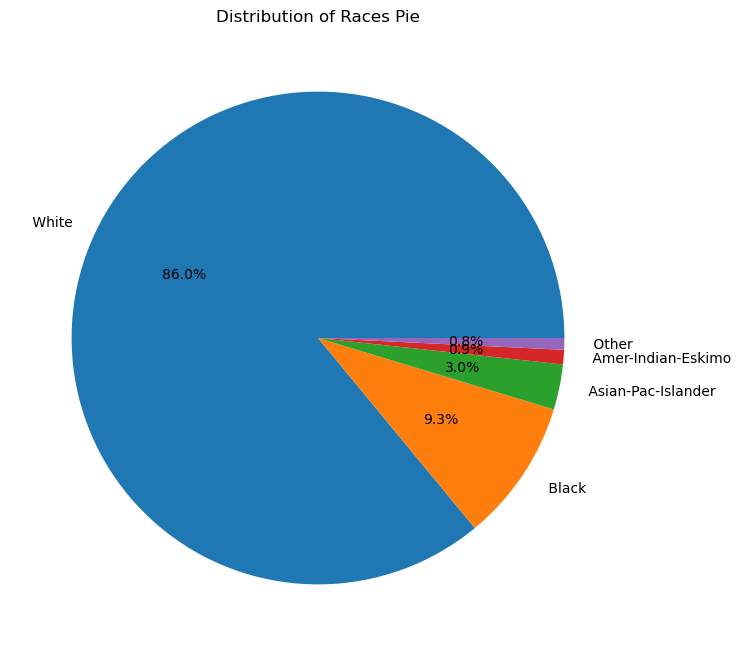

In [73]:
# Pie chart of the Race categories
plt.figure(figsize=(8,8))
sns.color_palette('viridis', n_colors=len(cleaned_df['race'].unique()))
plt.title("Distribution of Races Pie")
plt.pie(cleaned_df['race'].value_counts(), autopct='%1.1f%%', labels=cleaned_df['race'].unique())
plt.show()

## Distribution of Attained Grade Level by Race Discussion
I'd like to pause here and address the ethical implications of visual representations of education levels by race. These education levels are from a census survey in 1994. From the pie chart above, we can see that the overwhelming majority of participants were white, which can skew results and may lead to incorrect assumptions. Due to this, I will not be showing a breakdown of educational attainment by race. 

## Conclusion

From the graphs we have learned that the majority of the survey participants were white males employed in the Private sector. The median educational level of attainment was "Some College" across all work sectors. The interquartile range spanned from High School Graduate to Bachelor's Degree for all work sectors except for Private, which had an interquartile range from High School Graduate to Associates-Vocational. The male category had a larger interquartile range, but it's overall variance was wider than that of the female category. Racial examinations were omitted due to an imbalanced representation. 

<br><br>

## ASSIGNMENT END
Work completed after this cell is for my attempt at applying a classification algorithm to the dataset. 

I am following along using the examples provided at: 
[Imbalanced Classifaction - machinelearningmastery.com](https://machinelearningmastery.com/imbalanced-classification-with-the-adult-income-dataset/)

Special thanks to Jason Brownlee for this helpful tutorial.

In [74]:
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

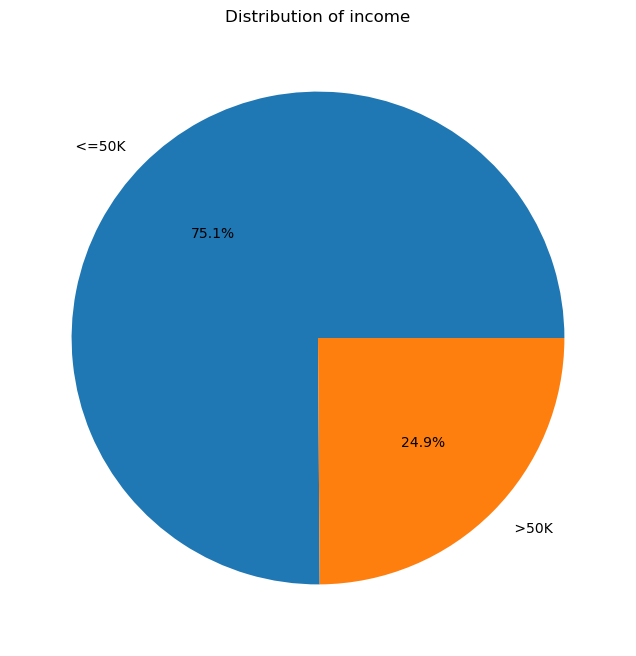

In [75]:
# First we will create a pie chart to see how imbalanced the distribution of income is
plt.figure(figsize=(8,8))
sns.color_palette('viridis', n_colors=len(cleaned_df['income'].unique()))
plt.title("Distribution of income")
plt.pie(cleaned_df['income'].value_counts(), autopct='%1.1f%%', labels=cleaned_df['income'].unique())
plt.show()

From the graph above, we can see that there is an imbalance with a skew toward less than $50k income.

## K-Fold Cross Validation Using Stratified Groups Explanation

Jason recommends using repeated, stratified, 10-fold cross-validation to estimate model performance.
K-fold (10-fold in our case) cross-validation splits the training data into k-groups (again 10 groups in our example). He also recommends using stratified groups, which contain the same mixture 75/25 (75% less than 50k, 25% more than 50k) to maintain the same example mixtures by class as the original dataset. Repeated means that the evaluation process will be run more than once to better capture the variance of the chosen model. 

K-fold cross-validation gives each training group 1 opportunity to be withheld as holdout data and k-1 opportunities to be test data.

To accomplish this, we will be using the scikit-learn class RepeatedStratifiedKFold. 


## Step 1 Create an Evaluation Function
The evaluate_model() function will be used to take the loaded dataset and classification model and evaluate it using Repeated Stratified k-fold cross-validation. It's return value with be a list of accuracy scores that can later be summarized. 

In [76]:
# Model Evaluation Function
def evaluate_model(X, y, model):
 # define evaluation procedure
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

## Step 2 Create a load_dataset() Function

This function will load the dataset and label encode the target column. We will also return a list of categorical and numeric columns so that we have them available if we wish to transform them when fitting models.

In [77]:
# Dataset Loading Function
def load_dataset(f_name):
    # Load the dataset as a numpy array
    dataframe = read_csv(f_name, header=None, na_values=' ?')
    # Drop the rows with missing values
    dataframe = dataframe.dropna()
    # Split into inputs and outputs
    last_col = len(dataframe.columns) - 1 # Income column
    # Jason uses a capital X, after some research, I discovered that it is in line with linear algebra notation,
    # to denote a matrix, rather than an array.
    # Matrices are capitalized, arrays are lowercase
    X, y = dataframe.drop(last_col, axis=1), dataframe[last_col]
    # Select categorical and numerical features
    cat_ix = X.select_dtypes(include=['object', 'bool']).columns
    num_ix = X.select_dtypes(include=['int64', 'float64']).columns
    # Label encode the target variable to have classes 0 and 1 (income column)
    y = LabelEncoder().fit_transform(y)
    return X.values, y, cat_ix, num_ix

## Step 3 Evaluate Baseline Model
When using classification accuracy, a naive model will predict the majority class for all cases. This provides a baseline in model performance on this problem by which all other models can be compared. (Brownlee, 2020)

This can be achieved using the DummyClassifier class from the scikit-learn library and setting the “strategy” argument to ‘most_frequent‘.

In [78]:
# Load the Dataset
f_name = 'adult.data'
X, y, cat_ix, num_ix = load_dataset(f_name)
# Summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

(30162, 14) (30162,) Counter({0: 22654, 1: 7508})


In [79]:
# Define the Reference Model
model = DummyClassifier(strategy='most_frequent')

In [80]:
# Evaluate the model
scores = evaluate_model(X, y, model)
# Summarize the performance
print(f'Mean Accuracy: {mean(scores):.3f} {std(scores):.3f}')

Mean Accuracy: 0.751 0.000


## Evaluate Models

Create a function to evaulate models. We will be evaluating the following models:
<ul>
    <li>    Support Vector Machine (SVM) </li>
    <li> Bagged Decision Trees (BAG) </li>
    <li> Random Forest (RF) </li>
    <li> Gradient Boosting Machine (GBM) </li>
</ul>

In [81]:
def get_models():
 models, names = list(), list()
 # CART
 models.append(DecisionTreeClassifier())
 names.append('CART')
 # SVM
 models.append(SVC(gamma='scale'))
 names.append('SVM')
 # Bagging
 models.append(BaggingClassifier(n_estimators=100))
 names.append('BAG')
 # RF
 models.append(RandomForestClassifier(n_estimators=100))
 names.append('RF')
 # GBM
 models.append(GradientBoostingClassifier(n_estimators=100))
 names.append('GBM')
 return models, names

## Pipeline Creation 

We need to create a pipeline to properly one-hot encode the categorical input variables and normalize the numerical input variables using MinMaxScaler. 


In [82]:
# Define models
models, names = get_models()
results = list()
print(names)

['CART', 'SVM', 'BAG', 'RF', 'GBM']


In [84]:
%time # MBP
# Evaluate each model
for i in range(len(models)):
    # Define Steps
    steps = [('c', OneHotEncoder(handle_unknown='ignore'),cat_ix), ('n',MinMaxScaler(),num_ix)]
    # One Hot Encode Categorical, normalize numerical
    ct = ColumnTransformer(steps)
    # Wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t', ct),('m',models[i])])
    # Evaluate the model and store the results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # Summarize Performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 13.8 µs
>CART 0.811 (0.007)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>SVM 0.835 (0.006)
>BAG 0.851 (0.006)
>RF 0.851 (0.007)
>GBM 0.862 (0.006)


## Using Precision 7500

In [ ]:
%%time

# Evaluate each model
for i in range(len(models)):
    # Define Steps
    steps = [('c', OneHotEncoder(handle_unknown='ignore'),cat_ix), ('n',MinMaxScaler(),num_ix)]
    # One Hot Encode Categorical, normalize numerical
    ct = ColumnTransformer(steps)
    # Wrap the model in a pipeline
    pipeline = Pipeline(steps=[('t', ct),('m',models[i])])
    # Evaluate the model and store the results
    scores = evaluate_model(X, y, pipeline)
    results.append(scores)
    # Summarize Performance
    print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))

>CART 0.812 (0.008)
>SVM 0.835 (0.006)
>BAG 0.852 (0.006)
